In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cpu'

In [4]:
# 前処理
transform = transforms.Compose([
    # 画像をTensorに変換してくれる
    # チャネルラストをチャネルファーストに
    # 0〜255の整数値を0.0〜1.0の浮動少数点に変換してくれる
    transforms.ToTensor()                              
])
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

Extracting ./MLP/data/MNIST/raw/train-images-idx3-ubyte.gz to ./MLP/data/MNIST/raw


Extracting ./MLP/data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MLP/data/MNIST/raw



Extracting ./MLP/data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MLP/data/MNIST/raw


Extracting ./MLP/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MLP/data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [5]:
num_batches = 100

In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=num_batches, shuffle=True)

In [7]:
train_iter = iter(train_dataloader)

In [8]:
train_iter

In [9]:
# 100個だけミニバッチからデータをロードする
imgs, labels = train_iter.next()

In [10]:
# 100個のデータ, グレースケール, 28px, 28px
imgs.size()

torch.Size([100, 1, 28, 28])

In [11]:
labels

tensor([1, 6, 2, 3, 1, 5, 0, 7, 1, 8, 9, 0, 2, 7, 3, 2, 8, 0, 0, 4, 7, 2, 1, 5,
        1, 7, 2, 5, 0, 5, 9, 8, 7, 8, 5, 0, 8, 8, 3, 0, 2, 3, 7, 3, 4, 4, 2, 7,
        9, 8, 7, 1, 7, 6, 8, 3, 5, 8, 8, 2, 6, 8, 6, 5, 7, 1, 5, 0, 3, 4, 4, 2,
        3, 6, 3, 9, 3, 4, 9, 7, 9, 5, 9, 4, 5, 8, 9, 4, 9, 7, 7, 4, 0, 7, 8, 9,
        7, 0, 1, 7])

In [12]:
img = imgs[0]

In [13]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [14]:
# 画像データを表示するために、チャネルファーストのデータをチャネルラストに変換する
img_permute = img.permute(1, 2, 0)

In [15]:
img_permute

tensor([[[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000]],

        [[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [

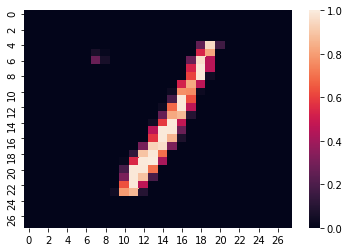

In [16]:
# tensorから2次元のarrayに変換する
sns.heatmap(img_permute.numpy()[:, :, 0])

In [17]:
labels[0]

tensor(1)

In [18]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            # 第1引数：input
            # 第2引数：output
            nn.Linear(28 * 28, 400),
            # メモリを節約出来る
            nn.ReLU(inplace=True),
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        output = self.classifier(x)
        return output

In [19]:
model = MLP()

In [20]:
model.to(device)

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        # dim=1 => 0-9の分類方向のMax値を返す
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    # 600回分で割る
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.30317524713153643, acc: 0.9103173017501831
epoch: 1, loss: 0.10486560077561687, acc: 0.9682163596153259
epoch: 2, loss: 0.07085319480005031, acc: 0.9783489108085632
epoch: 3, loss: 0.051208502954104916, acc: 0.983681857585907
epoch: 4, loss: 0.039856257903544856, acc: 0.9872986674308777
epoch: 5, loss: 0.031222712240414695, acc: 0.9899818897247314
epoch: 6, loss: 0.027141132558463142, acc: 0.991348147392273
epoch: 7, loss: 0.02016598453662785, acc: 0.9935652613639832
epoch: 8, loss: 0.018637861243769295, acc: 0.993831992149353
epoch: 9, loss: 0.018294134559328087, acc: 0.9940817356109619
epoch: 10, loss: 0.015549954691086896, acc: 0.9951152801513672
epoch: 11, loss: 0.015609512751610358, acc: 0.9950652122497559
epoch: 12, loss: 0.011300798359510129, acc: 0.9964988231658936
epoch: 13, loss: 0.013379513326005205, acc: 0.9955316185951233
epoch: 14, loss: 0.010116237265647214, acc: 0.9967653155326843


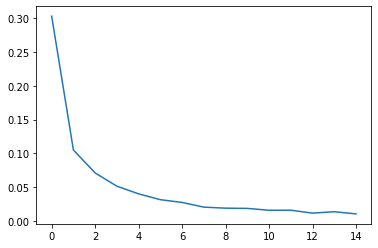

In [23]:
plt.plot(losses)

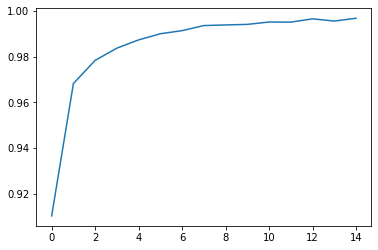

In [24]:
plt.plot(accs)

In [25]:
train_iter = iter(train_dataloader)

In [26]:
imgs, labels = train_iter.next()

In [27]:
labels

tensor([0, 5, 7, 4, 2, 0, 2, 2, 0, 1, 3, 1, 6, 8, 7, 4, 4, 9, 7, 1, 2, 2, 2, 5,
        5, 6, 3, 3, 2, 8, 0, 1, 6, 4, 4, 0, 8, 6, 9, 9, 9, 1, 7, 0, 5, 5, 2, 4,
        0, 7, 3, 2, 4, 6, 7, 4, 6, 3, 7, 3, 4, 1, 5, 4, 6, 9, 9, 2, 9, 9, 9, 9,
        6, 0, 6, 0, 7, 9, 7, 1, 6, 8, 2, 5, 4, 6, 7, 3, 8, 0, 7, 9, 3, 6, 2, 3,
        2, 8, 8, 5])

In [28]:
imgs_gpu = imgs.view(100, -1).to(device)
output= model(imgs_gpu)

In [29]:
pred = torch.argmax(output, dim=1)

In [30]:
pred

tensor([0, 5, 7, 4, 2, 0, 2, 2, 0, 1, 3, 1, 6, 8, 7, 4, 4, 9, 7, 1, 2, 2, 2, 5,
        5, 6, 3, 3, 2, 8, 0, 1, 6, 4, 4, 0, 8, 6, 9, 9, 9, 1, 7, 0, 5, 5, 2, 4,
        0, 7, 3, 2, 4, 6, 7, 4, 6, 3, 7, 3, 4, 1, 5, 4, 6, 9, 9, 2, 9, 9, 9, 9,
        6, 0, 6, 0, 7, 9, 7, 1, 6, 8, 2, 5, 4, 6, 7, 3, 8, 0, 7, 9, 3, 6, 2, 3,
        2, 8, 8, 5])

In [31]:
# 重み、バイアスを抜き出す
params = model.state_dict()

In [32]:
# 抜き出した重み、バイアスをprmファイルに保存する。
torch.save(params, "model.prm")

In [33]:
!ls

MLP  model.prm	sample_data


In [34]:
param_load = torch.load("model.prm")

In [35]:
model.load_state_dict(param_load)

<All keys matched successfully>

In [36]:
num_epochs = 10
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        # dim=1 => 0-9の分類方向のMax値を返す
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    # 600回分で割る
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.010084920997166288, acc: 0.9967657327651978
epoch: 1, loss: 0.00796181476405233, acc: 0.9973655343055725
epoch: 2, loss: 0.011313071262884477, acc: 0.995915412902832
epoch: 3, loss: 0.0075736459271138305, acc: 0.997515857219696
epoch: 4, loss: 0.01027795355610427, acc: 0.9967154860496521
epoch: 5, loss: 0.006435076927781627, acc: 0.9979325532913208
epoch: 6, loss: 0.00751345808648163, acc: 0.9974156618118286
epoch: 7, loss: 0.008477863503310345, acc: 0.9972990155220032
epoch: 8, loss: 0.0059549959689706115, acc: 0.9978830218315125
epoch: 9, loss: 0.005946328057404552, acc: 0.998015820980072
